In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
#importing data 
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#checking data types for columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

the features age,fpenlwgt,capital loss,capital gain,hours per week are integer type remaining all are object type

In [4]:
#describing the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#checking the shape of dataset
df.shape

(32560, 15)

dataset has 32560 rows and 15 columns

In [6]:
#checking the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

there are No null values

checking for unique values to identify whether it has any unnamed valued

In [7]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [9]:
((32560-31014)/32560)*100

4.7481572481572485

In [10]:
100-4.7481572481572485

95.25184275184276

95% value falls to same category 0 so it wont create impact on target column income

In [11]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [12]:
((32560-29849)/32560)*100

8.326167076167076

In [13]:
100-8.326167076167076

91.67383292383292

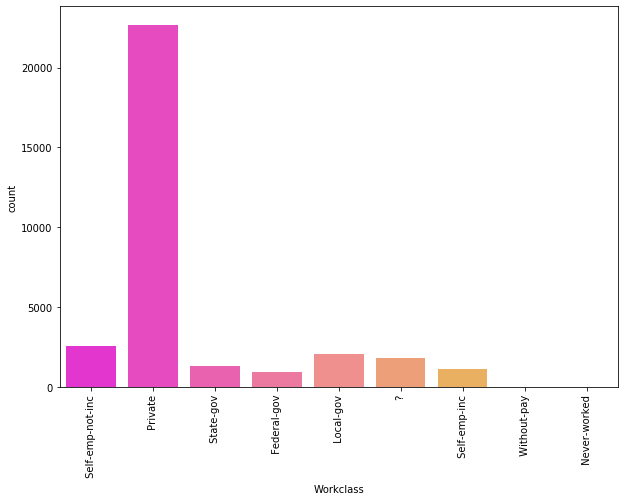

In [14]:
#PLOTTING GRAPH TO CHECK NULL VALUES
plt.figure(figsize=(10,7))
sns.countplot(x=df['Workclass'],data=df,palette="spring")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

data is missing in workclass feature.we need to fill it with mode as its catagorical column

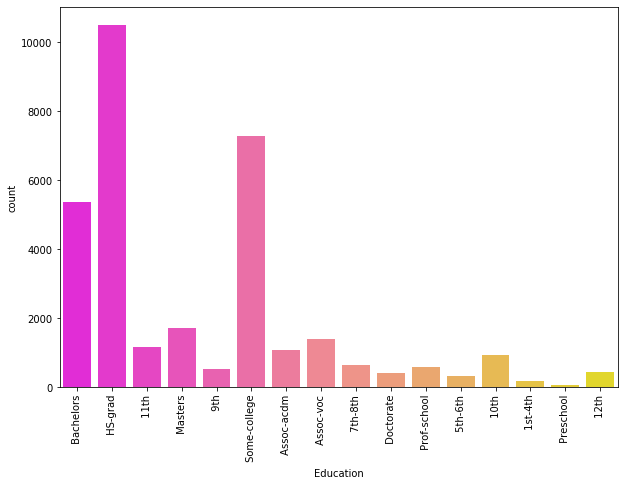

In [15]:
#PLOTTING GRAPH TO COUNT THE EDUCATION
plt.figure(figsize=(10,7))
sns.countplot(x=df['Education'],data=df,palette="spring")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

citizens with hs-grad is higher

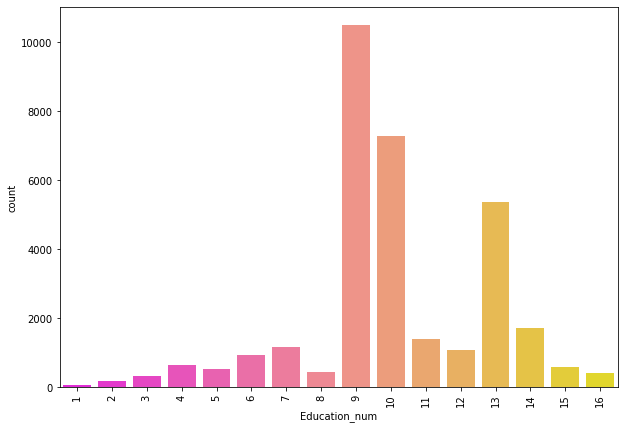

In [16]:
#PLOTTING GRAPH TO COUNT EDUCATION NUMBER
plt.figure(figsize=(10,7))
sns.countplot(x=df['Education_num'],data=df,palette="spring")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

more population with higher education 9

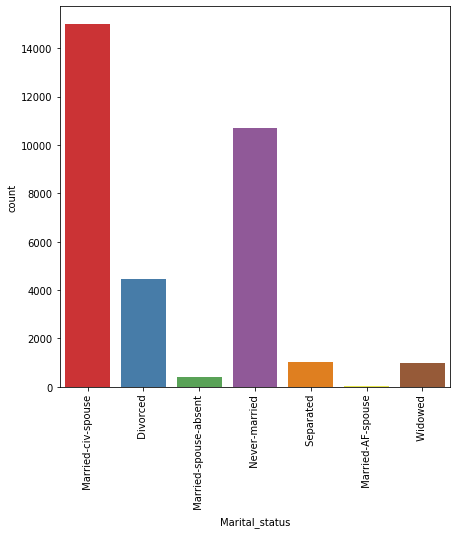

In [17]:
#PLOTTING GRAPH TO COUNT MARTIAL STATUS 
plt.figure(figsize=(7,7))
sns.countplot(x=df['Marital_status'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

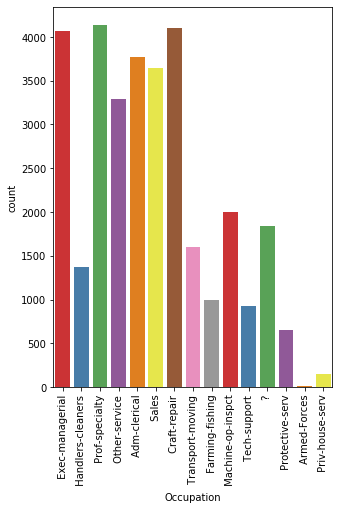

In [18]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Occupation'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

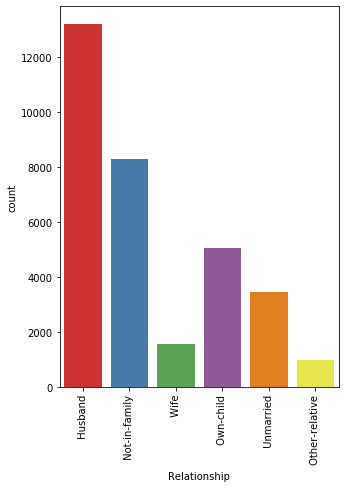

In [19]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Relationship'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

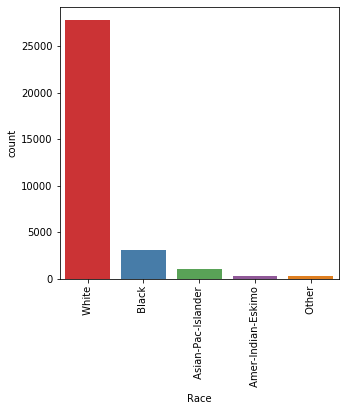

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Race'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

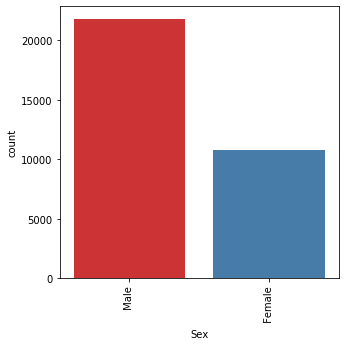

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Sex'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

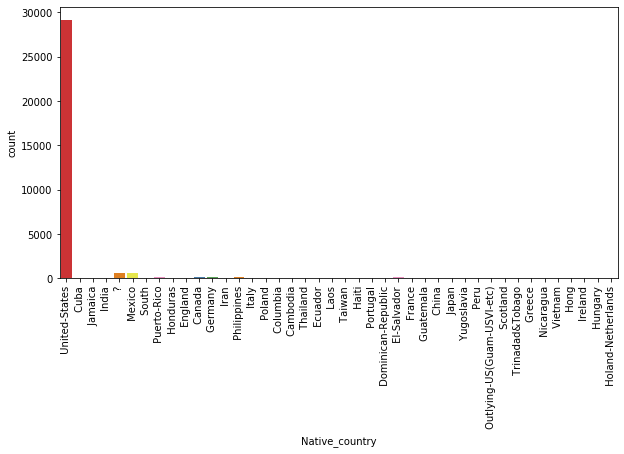

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Native_country'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

Native country feature also has missing value most of the data is about people in united states

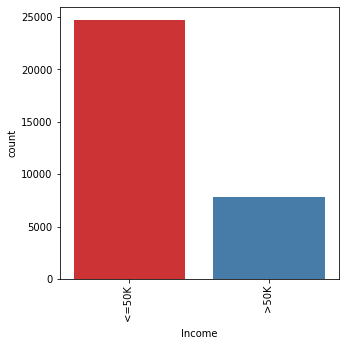

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Income'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

Majority of people having less than or equal 50000 income

In [24]:
#CHECKING COLUMNS
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [25]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
df.loc[df['Workclass']==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [27]:
#REPLACING "?" WITH NAN
df_new=df
df_new['Workclass']=df['Workclass'].replace(" ?",np.nan)
df_new['Occupation']=df['Occupation'].replace(" ?",np.nan)
df_new['Native_country']=df['Native_country'].replace(" ?",np.nan)

In [28]:
df_new.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Handling missing value

In [29]:
#FILLING NULL VALUES WITH MODE
df_mod=df_new.fillna(df_new.mode().iloc[0])

In [30]:
df_mod.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

BI VARIATE ANALYSIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

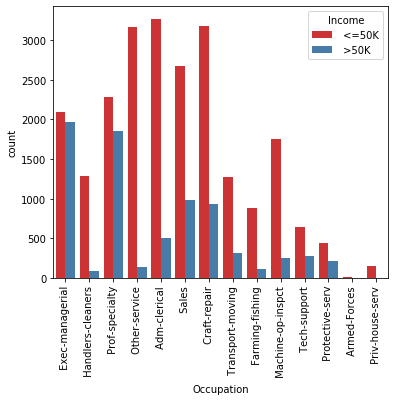

In [31]:
#PLOTTING GRAPH TO CHECK Distribution of income with Occupation
fig=plt.figure(figsize=(6,17))
rows = 3
cols = 1
i=0
color_l=['brown','blue','salmon','purple','pink','orange','salmon','red','grey','cyan']
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['Occupation'].unique())
sns.countplot(df_new['Occupation'],palette="Set1",hue=df_new.Income)
plt.xticks(rotation=90)

Most of them are belongs to prof-speciality category.most of the prof_speciality people getting income higher than 50,000. Most of the adm-clerical get highest salary

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

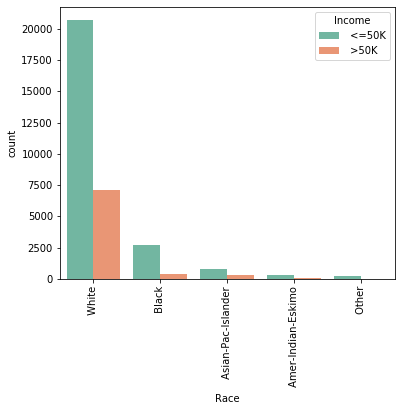

In [32]:
#PLOOTING GRAPH TO CHECK Distribution of income with RACE
fig=plt.figure(figsize=(6,17))
rows = 3
cols = 1
i=0
color_l=['cyan','grey','salmon','red','grey','pink']
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['Race'].unique())
sns.countplot(df_new['Race'],palette="Set2",hue=df_new.Income)
plt.xticks(rotation=90)

most of white earning less than 50000 and the majority race is white

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

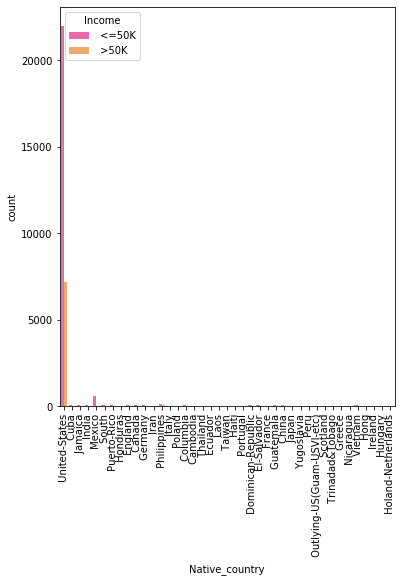

In [33]:
#PLOTTING GRAPH TO CHECK Distribution of income with Native
fig=plt.figure(figsize=(6,25))
rows = 3
cols = 1
i=0
color_l=['salmon','orange','pink','red','grey','cyan']
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['Native_country'].unique())
sns.countplot(df_new['Native_country'],palette="spring",hue=df_new.Income)
plt.xticks(rotation=90)

91.2% percentage of population belongs to unitedstates and majority of people earning more than 50000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

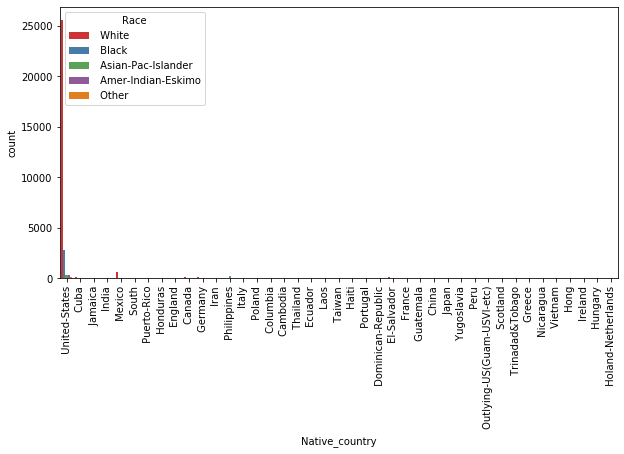

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df_new['Native_country'],palette="Set1",hue=df_new.Race)
plt.xticks(rotation=90)

except age and fnlwgt all are categorical column

In [35]:
data_clean=df_mod
col_encod=['Workclass', 'Education', 'Education_num',
       'Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [36]:
#USING LABEL ENCODER TO CONVERT OBJECT VALUE COLUMN TO STRING VALUE
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_clean[col]= label.fit_transform(df_mod[col])

In [37]:
data_clean.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,12,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,8,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,6,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,12,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,13,2,3,5,4,0,0,0,40,38,0


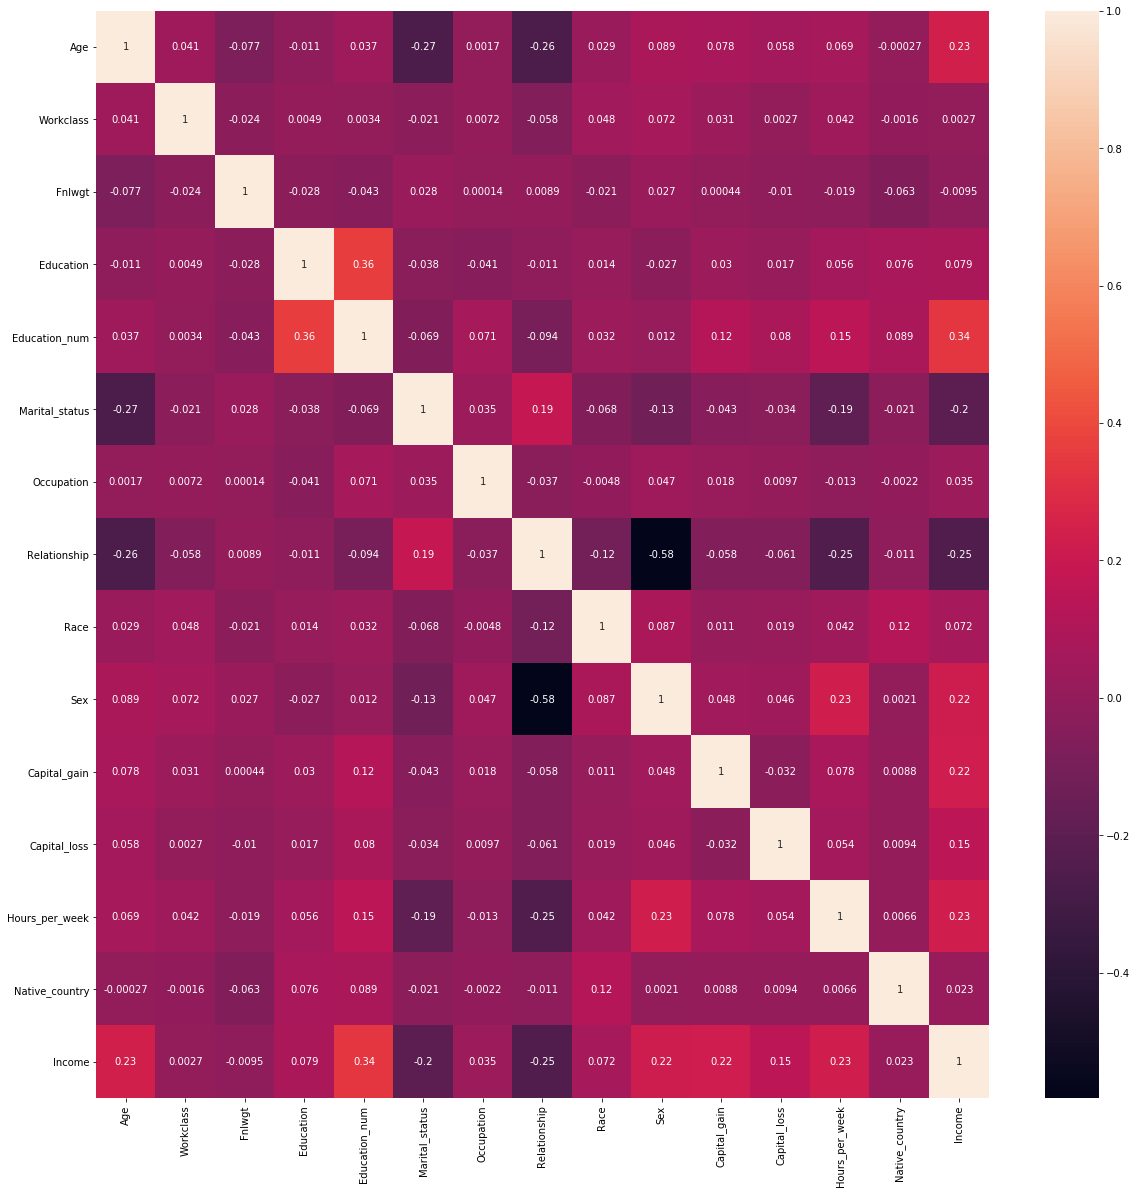

In [38]:
#PLOTTING CORRELATION BETWWEN COLUMNS
correlation=data_clean.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

fnlwgt is least corelated with income.Education number is highly correlated with Income.so I'm going to drop fnlwgt feature

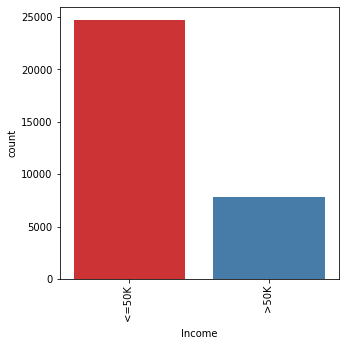

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Income'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

Handling Imbalance in target column

In [40]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
os=SMOTE()

splitting x and y and also remvoing Fnlwgt because it has slight correlation with target

In [41]:
colu=['Income']

In [42]:
x1=data_clean.drop(colu,axis=1)
y1=data_clean['Income']

In [43]:
x1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [44]:
x1,y1=os.fit_resample(x1,y1)

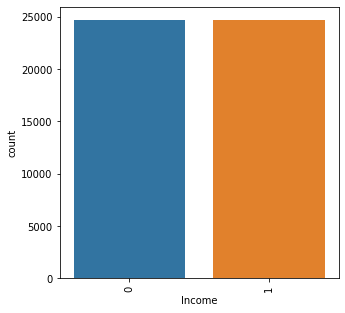

In [45]:
plt.figure(figsize=(5,5))
sns.countplot(x=y1)
plt.xticks(rotation=90)
plt.show()

SCALING

In [46]:
#SCLAING THE DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

In [47]:
#IMPORTING IMPORTATNT MODELS 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
x=scaled
y=y1

In [48]:
#SPILLITING THE DATA AND APPLYING ON DIFFERENT MODELS
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]

In [49]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))

LogisticRegression() 

Accuracy score: 0.7707119741100323 

"Confusion Matrix:
" [[4682 1588]
 [1246 4844]]
classification_report
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      6270
           1       0.75      0.80      0.77      6090

    accuracy                           0.77     12360
   macro avg       0.77      0.77      0.77     12360
weighted avg       0.77      0.77      0.77     12360

Average accuracy_score 0.7707119741100323
---------------------------------------------------------------------------------------------------------
RandomForestClassifier() 

Accuracy score: 0.8918284789644013 

"Confusion Matrix:
" [[5590  680]
 [ 657 5433]]
classification_report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6270
           1       0.89      0.89      0.89      6090

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.

CROSS VALIDATION

In [50]:
x=scaled
y=y1
scorel=[]

In [51]:
lr=LogisticRegression()
scores=cross_val_score(lr,x,y,cv=5)
scorel.append(scores)
scores

array([0.75010113, 0.7707322 , 0.77528317, 0.78264388, 0.78203702])

In [52]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.77760922, 0.85699838, 0.92738673, 0.93203196, 0.92909882])

In [53]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.75283172, 0.81917476, 0.87823625, 0.88338222, 0.88095479])

In [54]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.78226133, 0.85386327, 0.89846278, 0.90624052, 0.90310509])

In [55]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.75353964, 0.81725324, 0.89249595, 0.89238394, 0.8922828 ])

DIFFERENCE

In [56]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,5):
    print(models[i],"difference is",scorel[i]-acclist[i])

LogisticRegression() difference is [-2.06108414e-02  2.02265372e-05  4.57119741e-03  1.19319017e-02
  1.13250442e-02]
RandomForestClassifier() difference is [-0.11421926 -0.0348301   0.03555825  0.04020348  0.03727034]
KNeighborsClassifier() difference is [-0.09773463 -0.03139159  0.0276699   0.03281588  0.03038845]
GradientBoostingClassifier() difference is [-0.09735032 -0.02574838  0.01885113  0.02662887  0.02349344]
DecisionTreeClassifier() difference is [-0.10204288 -0.03832929  0.03691343  0.03680141  0.03670027]


GradientBoostingClassifier() has least difference

Finding best parameter using hyper tuning

In [57]:
x=scaled
y=y1
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

In [58]:
from sklearn.model_selection import GridSearchCV,KFold
params = {
    'loss':["deviance"],'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],'min_samples_split': [5, 10],'max_features':["log2","sqrt"], "n_estimators":[10,100]}

gs2 = GridSearchCV(GradientBoostingClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
gs2.fit(xtrain, ytrain)
print('Best param:', gs2.best_params_)

Fitting 3 folds for each of 168 candidates, totalling 504 fits
Best param: {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}


Modelling using best parameters

In [59]:
x=scaled
y=y1

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25,random_state=1)

In [61]:
model =GradientBoostingClassifier(learning_rate=0.2,loss='deviance',max_depth=8,max_features='sqrt',min_samples_split=5,n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9000809061488673

In [62]:
y_pred_1 = model.predict(x_test)

In [63]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",round(result2,2))

Confusion Matrix:
[[5671  599]
 [ 636 5454]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6270
           1       0.90      0.90      0.90      6090

    accuracy                           0.90     12360
   macro avg       0.90      0.90      0.90     12360
weighted avg       0.90      0.90      0.90     12360

Accuracy: 0.9


# Accuracy: 90%

Saving the model

In [65]:
from joblib import dump
dump(model, 'census.joblib')

['census.joblib']

In [66]:
from joblib import load
loaded = load('census.joblib')